In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
file_path="C:/Users/Soundarya/Downloads/diabetes_prediction_dataset.csv"
data = pd.read_csv(file_path)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


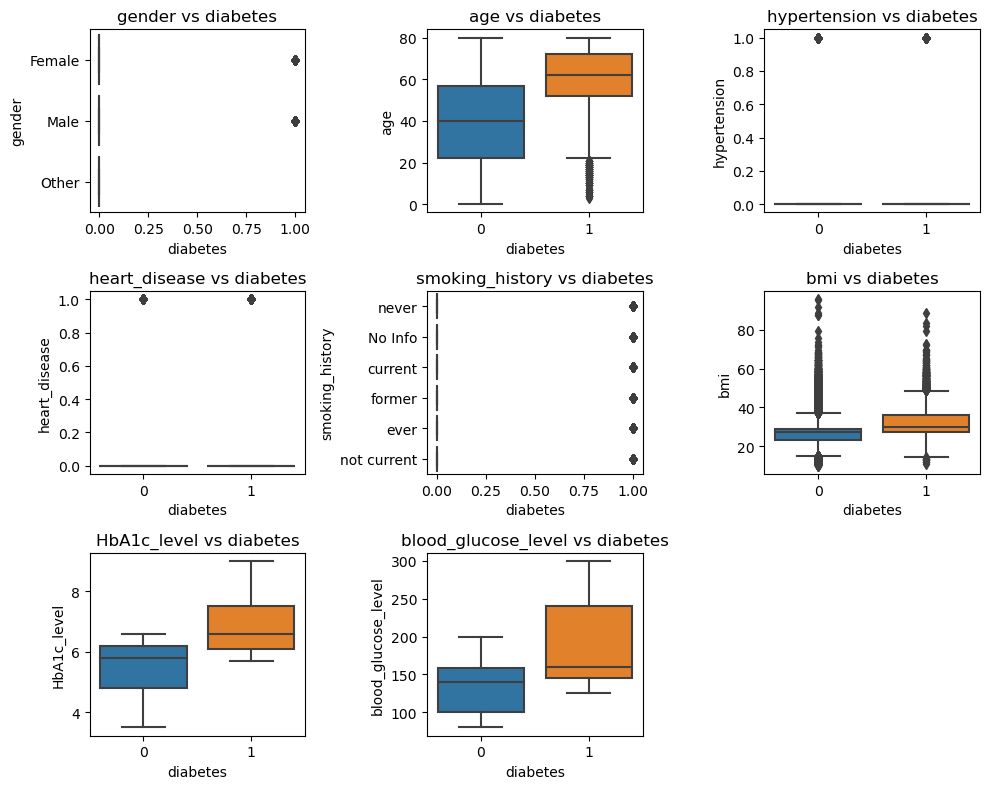

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
#columns_to_plot = ['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
plt.figure(figsize=(10, 8))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='diabetes', y=col, data=data)
    plt.title(f'{col} vs diabetes')
plt.tight_layout()
plt.show()



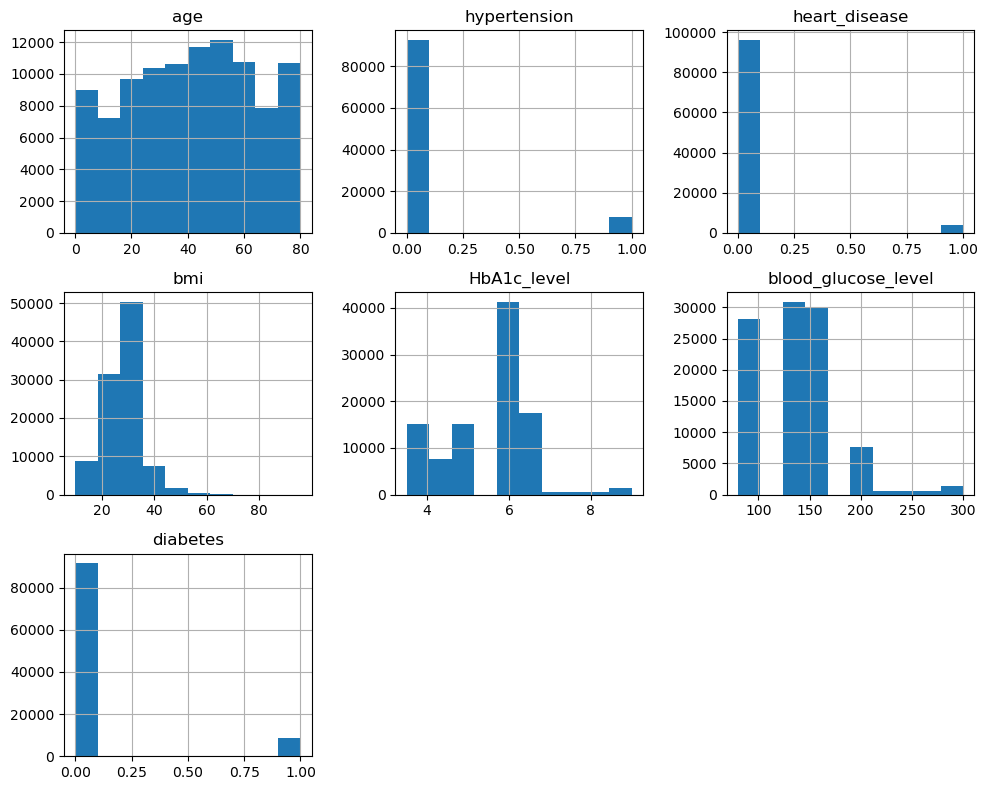

In [6]:
data.hist(figsize=(10, 8))
plt.title('Histogram of Features')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

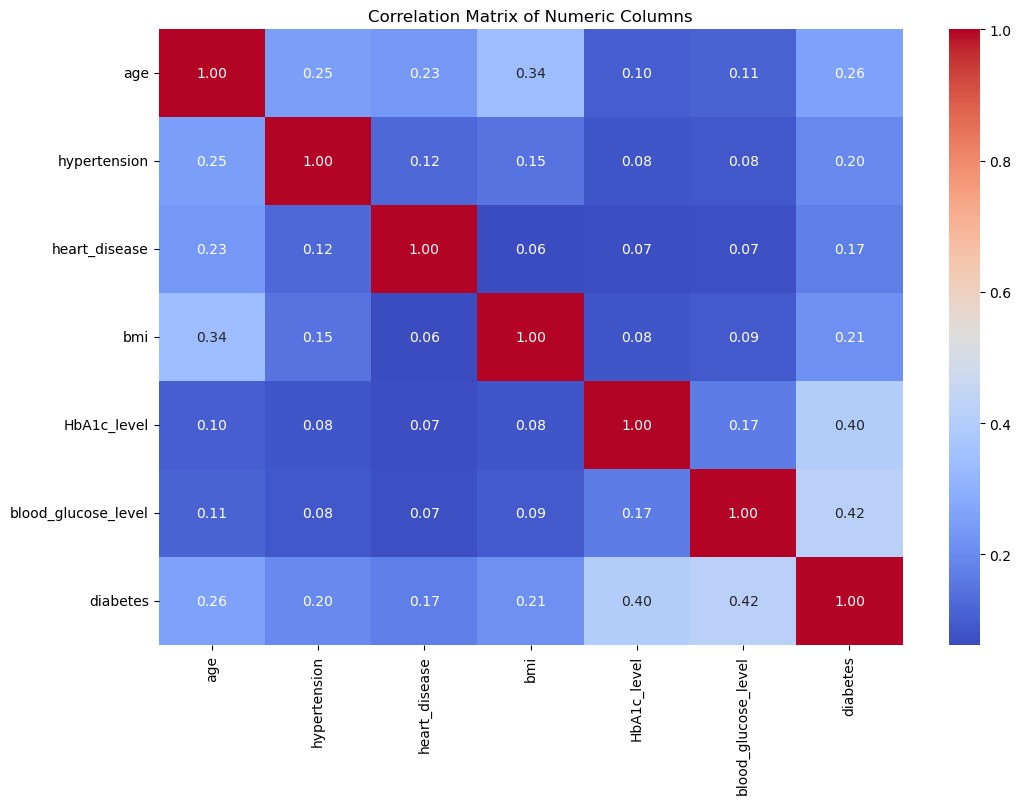

In [7]:
plt.figure(figsize=(12, 8))
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

0    91500
1     8500
Name: diabetes, dtype: int64


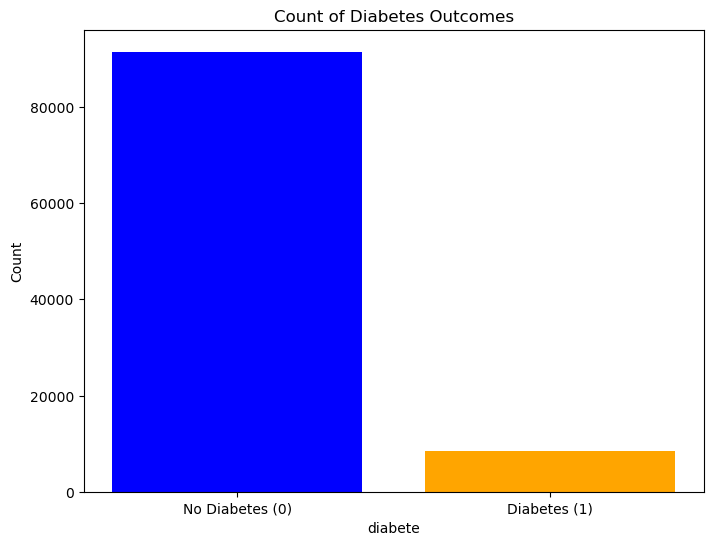

In [8]:
counts = data['diabetes'].value_counts()
print(counts)
# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values, color=['blue', 'orange'])
plt.title('Count of Diabetes Outcomes')
plt.xlabel('diabete')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.show()

In [9]:
categrorial_features =[]
numerical_features = []
for i in data.columns:
    if data[i].dtype=='O':
        categrorial_features.append(i)
    else: 
        numerical_features.append(i)
categrorial_features

['gender', 'smoking_history']

In [10]:
from sklearn.preprocessing import LabelEncoder
label_e = LabelEncoder()

for i in categrorial_features:
    data[i]= label_e.fit_transform(data[i])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd



# Separate features and target variable
X = data.drop('diabetes', axis=1)
y = data['diabetes']


from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

y.value_counts()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [12]:
y.value_counts()

0    91500
1    91500
Name: diabetes, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Apply PCA
pca = PCA(n_components=0.95)  # Keep components explaining 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

accuracy_scores = {}
classification_reports = {}
confusion_matrices = {}

# Fit each model and calculate accuracy, classification report, and confusion matrix using PCA transformed data
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    classification_reports[name] = classification_report(y_test, y_pred)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

    print(f'{name}:\nAccuracy: {accuracy_scores[name]:.4f}\nClassification Report:\n{classification_reports[name]}\nConfusion Matrix:\n{confusion_matrices[name]}\n')


Logistic Regression:
Accuracy: 0.8862
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     18300
           1       0.88      0.89      0.89     18300

    accuracy                           0.89     36600
   macro avg       0.89      0.89      0.89     36600
weighted avg       0.89      0.89      0.89     36600

Confusion Matrix:
[[16172  2128]
 [ 2037 16263]]

Decision Tree:
Accuracy: 0.9167
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     18300
           1       0.91      0.92      0.92     18300

    accuracy                           0.92     36600
   macro avg       0.92      0.92      0.92     36600
weighted avg       0.92      0.92      0.92     36600

Confusion Matrix:
[[16649  1651]
 [ 1399 16901]]

Random Forest:
Accuracy: 0.9396
Classification Report:
              precision    recall  f1-score   support

           0       0

C:\Users\Soundarya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors:
Accuracy: 0.9305
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     18300
           1       0.91      0.95      0.93     18300

    accuracy                           0.93     36600
   macro avg       0.93      0.93      0.93     36600
weighted avg       0.93      0.93      0.93     36600

Confusion Matrix:
[[16588  1712]
 [  830 17470]]

Neural Network:
Accuracy: 0.9198
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     18300
           1       0.91      0.93      0.92     18300

    accuracy                           0.92     36600
   macro avg       0.92      0.92      0.92     36600
weighted avg       0.92      0.92      0.92     36600

Confusion Matrix:
[[16564  1736]
 [ 1198 17102]]



In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Neural Network', MLPClassifier(max_iter=1000))
]

stacking_clf = StackingClassifier(
    estimators=models,
    final_estimator=RandomForestClassifier()  # Meta-learner
)

# Fit the stacking classifier on the training data
stacking_clf.fit(X_train_pca, y_train)

# Predict on the test data
y_pred_stacking = stacking_clf.predict(X_test_pca)

# Calculate the accuracy of the stacking classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print('Accuracy of Stacking Classifier: {:.4f}'.format(accuracy_stacking))

Accuracy of Stacking Classifier: 0.9448


In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



# Define individual classifiers
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Neural Network', MLPClassifier(max_iter=1000))
]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=models, voting='hard')

# Fit the voting classifier on the training data
voting_clf.fit(X_train_pca, y_train)

# Predict on the test data
y_pred_voting = voting_clf.predict(X_test_pca)

# Evaluate the voting classifier
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier Accuracy: {voting_accuracy:.4f}')


C:\Users\Soundarya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Voting Classifier Accuracy: 0.9289


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
 Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pca, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
1830/1830 [==============================] - 3s 1ms/step - loss: 0.3090 - accuracy: 0.8649 - val_loss: 0.2132 - val_accuracy: 0.8976
Epoch 2/20
1830/1830 [==============================] - 2s 1ms/step - loss: 0.2292 - accuracy: 0.8960 - val_loss: 0.1886 - val_accuracy: 0.9092
Epoch 3/20
1830/1830 [==============================] - 2s 1ms/step - loss: 0.2109 - accuracy: 0.9017 - val_loss: 0.1858 - val_accuracy: 0.9108
Epoch 4/20
1830/1830 [==============================] - 2s 1ms/step - loss: 0.2049 - accuracy: 0.9030 - val_loss: 0.1816 - val_accuracy: 0.9117
Epoch 5/20
1830/1830 [==============================] - 2s 1ms/step - loss: 0.2027 - accuracy: 0.9041 - val_loss: 0.1785 - val_accuracy: 0.9134
Epoch 6/20
1830/1830 [==============================] - 2s 1ms/step - loss: 0.2016 - accuracy: 0.9047 - val_loss: 0.1801 - val_accuracy: 0.9119
Epoch 7/20
1830/1830 [==============================] - 2s 1ms/step - loss: 0.2001 - accuracy: 0.9058 - val_loss: 0.1790 - val_accuracy:

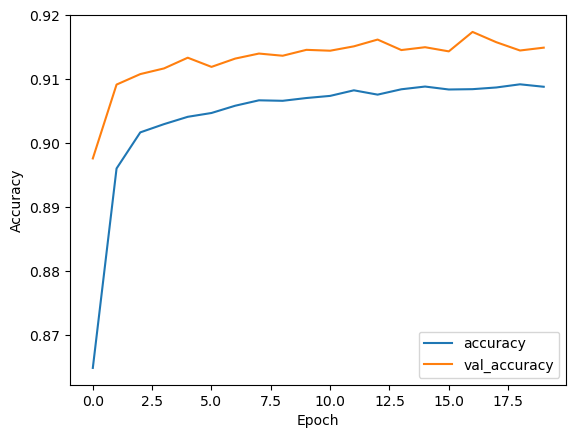

In [25]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
test_loss, test_accuracy = model.evaluate(X_test_pca, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

1144/1144 [==============================] - 1s 634us/step - loss: 0.1753 - accuracy: 0.9137
Test accuracy: 0.9137


In [27]:
y_pred = model.predict(X_test_pca)
from sklearn.metrics import confusion_matrix, classification_report

y_pred_classes = (y_pred > 0.5).astype("int32")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

1144/1144 [==============================] - 1s 584us/step
Confusion Matrix:
[[16394  1906]
 [ 1254 17046]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     18300
           1       0.90      0.93      0.92     18300

    accuracy                           0.91     36600
   macro avg       0.91      0.91      0.91     36600
weighted avg       0.91      0.91      0.91     36600



In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, 8)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history_lstm = lstm_model.fit(
    X_train_pca, y_train, 
    epochs=100, batch_size=64, validation_split=0.2, 
    callbacks=[early_stopping]
)



Epoch 1/100
1830/1830 [==============================] - 3s 1ms/step - loss: 0.2579 - accuracy: 0.8896 - val_loss: 0.2121 - val_accuracy: 0.8976
Epoch 2/100
1830/1830 [==============================] - 2s 1ms/step - loss: 0.2045 - accuracy: 0.9040 - val_loss: 0.1938 - val_accuracy: 0.9057
Epoch 3/100
1830/1830 [==============================] - 2s 1ms/step - loss: 0.1925 - accuracy: 0.9086 - val_loss: 0.1888 - val_accuracy: 0.9069
Epoch 4/100
1830/1830 [==============================] - 2s 1ms/step - loss: 0.1858 - accuracy: 0.9108 - val_loss: 0.1815 - val_accuracy: 0.9101
Epoch 5/100
1830/1830 [==============================] - 2s 1ms/step - loss: 0.1820 - accuracy: 0.9121 - val_loss: 0.1780 - val_accuracy: 0.9103
Epoch 6/100
1830/1830 [==============================] - 2s 1ms/step - loss: 0.1796 - accuracy: 0.9130 - val_loss: 0.1772 - val_accuracy: 0.9115
Epoch 7/100
1830/1830 [==============================] - 2s 1ms/step - loss: 0.1778 - accuracy: 0.9144 - val_loss: 0.1748 - val_ac

In [25]:
X_test_pca = X_test_pca.reshape((X_test_pca.shape[0], 1, X_test_pca.shape[1]))

# Evaluate the model on the test set
test_loss, test_accuracy = lstm_model.evaluate(X_test_pca, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

1144/1144 [==============================] - 1s 787us/step - loss: 0.1650 - accuracy: 0.9188
Test Loss: 0.1650, Test Accuracy: 0.9188


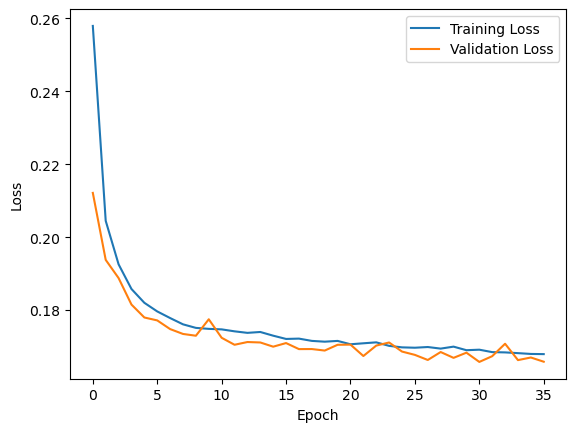

In [27]:
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions on the test set
# Make predictions on the test set
y_pred_probs = lstm_model.predict(X_test_pca)

# Convert probabilities to class labels
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



1144/1144 [==============================] - 1s 670us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     18300
           1       0.91      0.93      0.92     18300

    accuracy                           0.92     36600
   macro avg       0.92      0.92      0.92     36600
weighted avg       0.92      0.92      0.92     36600

Confusion Matrix:
 [[16689  1611]
 [ 1360 16940]]


In [29]:
print("Current shape of X_test_pca:", X_test_pca.shape)


Current shape of X_test_pca: (36600, 1, 8)
